# What are the most demanded skills for the top 3 most popular data roles?

#### Methodology
1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Filter data on the US:
df_US = df[df['job_country'] == 'United States']

In [3]:
# Explode job skills as it is currently a string:
df_skills = df_US.explode('job_skills')

# Create a new dataframe with the exploded job skills:
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [5]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count by reseting the index:
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order:
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [7]:
# Get he top three roles

# First we need to get the unique job_title_short
job_titles = df_skills_count['job_title_short'].unique()

job_titles # This is an array of the unique job_title_short

array(['Data Scientist', 'Data Analyst', 'Data Engineer',
       'Senior Data Scientist', 'Senior Data Analyst',
       'Senior Data Engineer', 'Business Analyst', 'Software Engineer',
       'Machine Learning Engineer', 'Cloud Engineer'], dtype=object)

In [8]:
# We can change the array to a list using the to list method
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer',
 'Business Analyst',
 'Software Engineer',
 'Machine Learning Engineer',
 'Cloud Engineer']

In [9]:
# to get the top 3, we can use a slicer and then sort to get the result alphabetically:
job_titles = sorted(job_titles[:3]) # taking index 0, 1, and 2 (top 3)

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

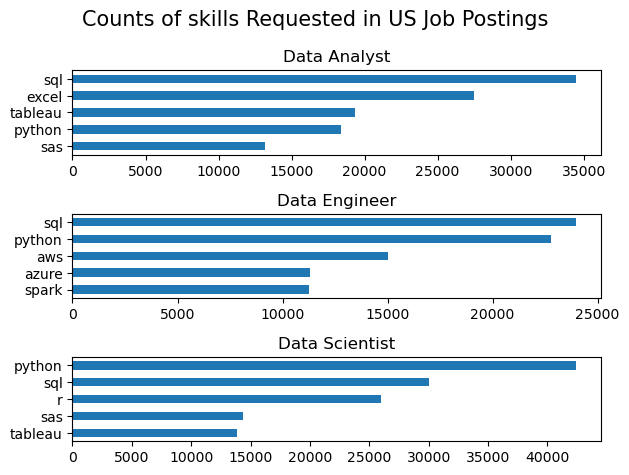

In [11]:
#next we plot:
# we need 3 separate plots because there are 3 top roles
# each plot will be a role and there will be 1 column

fig, ax = plt.subplots(len(job_titles), 1) # length of job titles is 3 lenght or column is 1

# next we need to loop through the job_titles list pulling both the index (i) and job title (job_title)
# we want to plot the 3 jobs as 3 plots with their top 5 skills from the dataframe df_skills_count

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5) # this will pull the top 5 skills for each job_title in the job_titles list
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)

    # additional cleanup:
    ax[i].invert_yaxis() # sorts the yaxis descending
    ax[i].set_ylabel('') # remove the yaxis label
    ax[i].legend().set_visible(False) # remove the legend

fig.suptitle('Counts of skills Requested in US Job Postings', fontsize=15)
plt.tight_layout()
plt.show()


In [12]:
# we want to convert the above to a percentage so we need to get the job counts to compare the skill counts to the job counts
df_US['job_title_short'].value_counts() # this result is a series, but we need it as a dataframe so we need to reset the index

job_title_short
Data Analyst                 67816
Data Scientist               58830
Data Engineer                35080
Senior Data Scientist        12946
Senior Data Analyst          11791
Senior Data Engineer          9289
Business Analyst              7382
Software Engineer             1814
Machine Learning Engineer      921
Cloud Engineer                 423
Name: count, dtype: int64

In [14]:
# We will reset the index and name the new column 'jobs_total'
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [15]:
# we need to now merge the jobs count with the job skills count using the pandas merge
# we are using the base dataframe of the skills count and bringing in the title count via a left join
# how is a left join and we are joining on job_title_short

df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [17]:
# we now need a percent column that is a calculation in the dataframe
# to the the values into a percent format instead of decimal, we need to multiply by 100

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total'])*100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


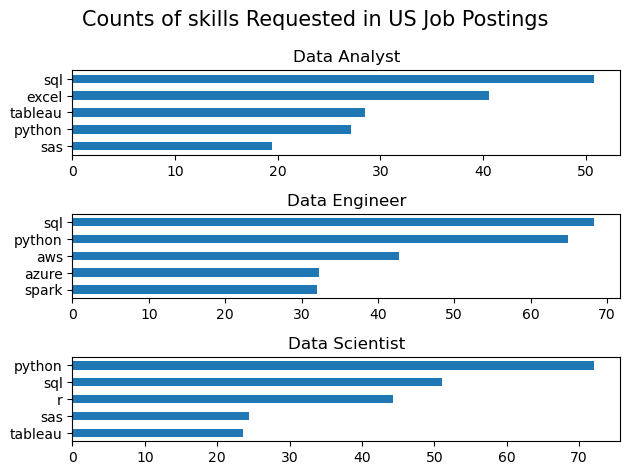

In [18]:
# now we can replot the oringial with the percentages using the new dataframe:
# we need to update the dataframe from df_skills_count to df_skills_perc
# and we need to update the y value of skill_count to skill_percent

fig, ax = plt.subplots(len(job_titles), 1) # length of job titles is 3 lenght or column is 1

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5) # this will pull the top 5 skills for each job_title in the job_titles list
    df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)

    # additional cleanup:
    ax[i].invert_yaxis() # sorts the yaxis descending
    ax[i].set_ylabel('') # remove the yaxis label
    ax[i].legend().set_visible(False) # remove the legend

fig.suptitle('Likelihood of skills Requested in US Job Postings', fontsize=15)
plt.tight_layout()
plt.show()

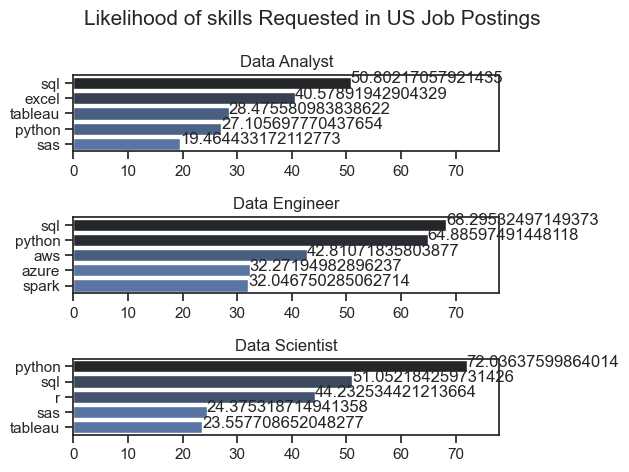

In [23]:
# We will upgrade the above using seaborn
# This means we need to update the plotting function below (original is commented out)

fig, ax = plt.subplots(len(job_titles), 1) # length of job titles is 3 lenght or column is 1

# additonal update using seaborn (setting the theme)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5) # this will pull the top 5 skills for each job_title in the job_titles list
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)

    # updating to seaborn
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')

    # additional cleanup:
    #ax[i].invert_yaxis() # sorts the yaxis descending #invert is no longer needed for seaborn!
    ax[i].set_ylabel('') # remove the yaxis label
    ax[i].legend().set_visible(False) # remove the legend
    
    
    # more additonal cleanup:
    ax[i].set_xlabel('') # remove the xaxis label
    ax[i].set_xlim(0, 78) # this makes everything on the same scale
    ax[i].set_title(job_title)

    # creating another loop for plot labels
    # we will cylcle through the index (n) and value (v)
    # v will be the x value and n will be the y value

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v, n, v) # v is the x position, n is the y position, and v is also the value plotted

fig.suptitle('Likelihood of skills Requested in US Job Postings', fontsize=15)
plt.tight_layout()
plt.show()

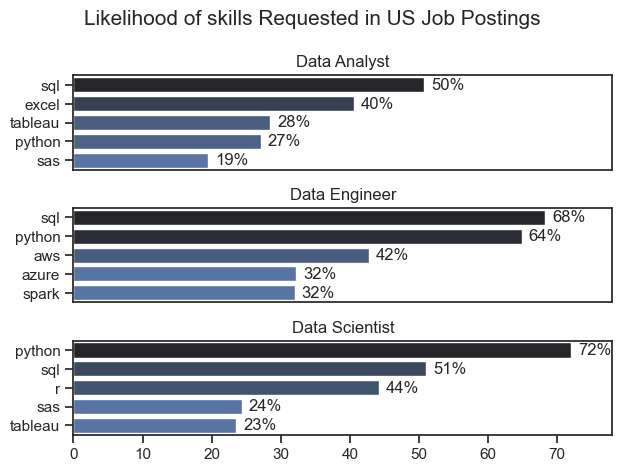

In [26]:
# We can clean up the seaborn plots even more, specifically the labels on the plots:

fig, ax = plt.subplots(len(job_titles), 1) # length of job titles is 3 lenght or column is 1

# additonal update using seaborn (setting the theme)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5) # this will pull the top 5 skills for each job_title in the job_titles list
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)

    # updating to seaborn
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')

    # additional cleanup:
    #ax[i].invert_yaxis() # sorts the yaxis descending #invert is no longer needed for seaborn!
    ax[i].set_ylabel('') # remove the yaxis label
    ax[i].legend().set_visible(False) # remove the legend
    
    
    # more additonal cleanup:
    ax[i].set_xlabel('') # remove the xaxis label
    ax[i].set_xlim(0, 78) # this makes everything on the same scale
    ax[i].set_title(job_title)

    # creating another loop for plot labels
    # we will cylcle through the index (n) and value (v)
    # v will be the x value and n will be the y value

    for n, v in enumerate(df_plot['skill_percent']):
        #ax[i].text(v, n, v) # v is the x position, n is the y position, and v is also the value plotted

        # updating this loop for formatting:
        # v + 1 shifts the text over
        # f' string helps with the label (number) formatting
        # va helps center the label
        ax[i].text(v + 1, n, f'{int(v)}%', va='center') # v is the x position, n is the y position, and v is also the value plotted

    if i != len(job_titles) - 1: # if the index <> 2 (the last index), then remove the ticks, so for index 0 and 1, no ticks
        ax[i].set_xticks([])

fig.suptitle('Likelihood of skills Requested in US Job Postings', fontsize=15)
plt.tight_layout()
plt.show()